# Yahoo Finance API

API usage limits:
 - Free: 100 requests per day

API restrictions per stock:
 - Past 7 days of 1 min data
 - Past 60 days of 5 min data
 - Past 60 days of 15 min data
 - .. up to daily data (? not sure)


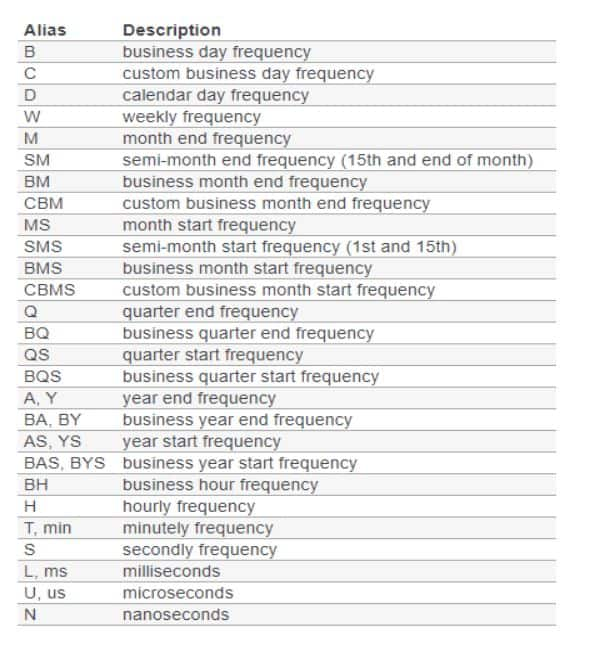

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [ ]:
headers = {
    'x-rapidapi-key': "8445aa06bfmsh3497bfcfccdbc4cp1b625ajsna0cadeca232b",
    'x-rapidapi-host': "yahoo-finance-low-latency.p.rapidapi.com"
    }


In [25]:
stock = 'DTEGY'

url = f"https://yahoo-finance-low-latency.p.rapidapi.com/v8/finance/chart/{stock}"

# Ranges: m, d, wk, mo
querystring = {
    "interval": "15m",
    "range": "60d",
    "region":"DE", 
    "events":"div,split"}


response = requests.request("GET", url, headers=headers, params=querystring)

# Parse response
import json
data = json.loads(response.text)

if data['chart']['error']:
    print("API ERROR: ", data['chart']['error'])


{"chart":{"result":[{"meta":{"currency":"USD","symbol":"DTEGY","exchangeName":"PNK","instrumentType":"EQUITY","firstTradeDate":848327400,"regularMarketTime":1612558688,"gmtoffset":-18000,"timezone":"EST","exchangeTimezoneName":"America/New_York","regularMarketPrice":18.2,"chartPreviousClose":17.28,"previousClose":18.395,"scale":3,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EST","start":1612515600,"end":1612535400,"gmtoffset":-18000},"regular":{"timezone":"EST","start":1612535400,"end":1612558800,"gmtoffset":-18000},"post":{"timezone":"EST","start":1612558800,"end":1612573200,"gmtoffset":-18000}},"tradingPeriods":[[{"timezone":"EST","start":1605018600,"end":1605042000,"gmtoffset":-18000}],[{"timezone":"EST","start":1605105000,"end":1605128400,"gmtoffset":-18000}],[{"timezone":"EST","start":1605191400,"end":1605214800,"gmtoffset":-18000}],[{"timezone":"EST","start":1605277800,"end":1605301200,"gmtoffset":-18000}],[{"timezone":"EST","start":1605537000,"end":1605560400,"gmtoff

In [13]:
data = response.text

In [32]:
results = data['chart']['result']

result = results[0]
meta = result['meta']


In [50]:
timestamps = result['timestamp']
quote = result['indicators']['quote'][0]

In [54]:
datadf = {'timestamp': timestamps, **quote}
df = pd.DataFrame(datadf)
df.head()

,timestamp,open,volume,high,low,close
0,1605018600,17.431499,3379.0,17.445000,17.350000,17.350000
1,1605019500,17.370001,499.0,17.370001,17.370001,17.370001
2,1605020400,17.520000,3251.0,17.565001,17.520000,17.565001
3,1605021300,17.580000,1672.0,17.590000,17.530001,17.530001
4,1605022200,17.490000,1085.0,17.490000,17.490000,17.490000


In [56]:
df = df.assign(timestamp = df.timestamp.apply(datetime.utcfromtimestamp))

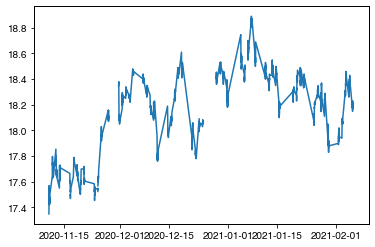

In [60]:
plt.plot(df['timestamp'], df['close'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1538 non-null   datetime64[ns]
 1   open       1470 non-null   float64       
 2   volume     1470 non-null   float64       
 3   high       1470 non-null   float64       
 4   low        1470 non-null   float64       
 5   close      1470 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.2 KB


In [58]:
df.head()

,timestamp,open,volume,high,low,close
0,2020-11-10 14:30:00,17.431499,3379.0,17.445000,17.350000,17.350000
1,2020-11-10 14:45:00,17.370001,499.0,17.370001,17.370001,17.370001
2,2020-11-10 15:00:00,17.520000,3251.0,17.565001,17.520000,17.565001
3,2020-11-10 15:15:00,17.580000,1672.0,17.590000,17.530001,17.530001
4,2020-11-10 15:30:00,17.490000,1085.0,17.490000,17.490000,17.490000


In [81]:
res = df.set_index('timestamp').resample('B')

In [82]:
res.mean()

,open,volume,high,low,close
timestamp,,,,,
2020-11-10,17.477480,2578.520000,17.489960,17.460980,17.471900
2020-11-11,17.671000,2614.200000,17.698176,17.661368,17.680924
2020-11-12,17.716904,5703.038462,17.730804,17.700673,17.714846
2020-11-13,17.658821,3982.916667,17.677729,17.650438,17.667679
2020-11-16,17.557222,4410.130435,17.568035,17.540339,17.553370
...,...,...,...,...,...
2021-02-01,17.958200,3351.346154,17.971038,17.944231,17.958077
2021-02-02,18.046612,2241.640000,18.057248,18.040884,18.050812
2021-02-03,18.384146,4165.000000,18.398039,18.371531,18.384250


In [67]:
df.tail()

,timestamp,open,volume,high,low,close
1533,2021-02-05 19:45:00,18.171499,723.0,18.209900,18.171499,18.195000
1534,2021-02-05 20:00:00,18.184999,1553.0,18.186501,18.173000,18.186501
1535,2021-02-05 20:15:00,18.195000,1990.0,18.209999,18.195000,18.209999
1536,2021-02-05 20:30:00,18.180099,222.0,18.180099,18.180099,18.180099
1537,2021-02-05 20:45:00,18.200001,3370.0,18.200001,18.190001,18.200001


In [33]:
meta

{'currency': 'USD',
 'symbol': 'DTEGY',
 'exchangeName': 'PNK',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 848327400,
 'regularMarketTime': 1612558688,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 18.2,
 'chartPreviousClose': 17.28,
 'previousClose': 18.395,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1612515600,
   'end': 1612535400,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1612535400,
   'end': 1612558800,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1612558800,
   'end': 1612573200,
   'gmtoffset': -18000}},
 'tradingPeriods': [[{'timezone': 'EST',
    'start': 1605018600,
    'end': 1605042000,
    'gmtoffset': -18000}],
  [{'timezone': 'EST',
    'start': 1605105000,
    'end': 1605128400,
    'gmtoffset': -18000}],
  [{'timezone': 'EST',
    'start': 1605191400,
    'end': 1605214800,
    'gmtoffset': -18000}],

In [22]:
data['chart']['error'].keys()

AttributeError: 'NoneType' object has no attribute 'keys'

In [19]:
type(data)

dict

In [10]:
from datetime import datetime
ts = 1607353057
datetime.utcfromtimestamp(ts)

datetime.datetime(2020, 12, 7, 14, 57, 37)

In [91]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

In [ ]:
for date in np.unique(df['date'])

In [87]:
dates = df.set_index('timestamp').resample('D').mean().index


DatetimeIndex(['2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
      

In [6]:
import time

In [9]:
time.time()

1612709961.465495